# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name: Kevin Han

Student UT EID: kh38823


---

Date Created: Sat Mar 16

Date Last Modified: Tue Mar 19

---

Totoal Points 20. 



## Support Vector Machine 

In [127]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [128]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [129]:
# hot encode
heart_df['Target'] = heart_df['Target'].map({'No': 0, 'Yes': 1})

In [130]:
# define variables
training, testing, disease_train, disease_test = train_test_split(heart_df[['Age', 'Sex', 'Chol']], heart_df['Target'], test_size=0.2, random_state=123)


# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [131]:
# implement scikit-learn SVM
model = svm.SVC()
model.fit(training, disease_train)



y_pred = model.predict(testing)

print("Accuracy Score:", accuracy_score(disease_test, y_pred))

# print classification report from scikit-learn
from sklearn.metrics import classification_report
print(classification_report(disease_test,y_pred))


Accuracy Score: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        33
           1       0.42      0.29      0.34        28

    accuracy                           0.49        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.48      0.49      0.47        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [132]:
# borrow hinge loss function from github
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

# borrow gradient function from github
def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * np.dot(y[ind], X[ind]))
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

# train the model
# set up data
weights = np.zeros(3)
num_iterations = 100
LR = 0.001
regularization = 0.005
cost_list = []
training_list = training.values.tolist()
disease_training_list = disease_train.values.tolist()
# Now we optimize it using Gradient Descent. 


for i in range(0, num_iterations):
    
    cost = compute_cost(training, disease_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "weights", weights)
    
    cost_list.append(cost)
    
    grad = calculate_gradient(training_list, disease_training_list, weights, regularization)
    
    weights = weights - LR * grad


Epoch 0 Cost is: 0.005 weights [0. 0. 0.]
Epoch 1 Cost is: 0.0046461626067153036 weights [1.29876033e-04 1.79752066e-06 5.80640496e-04]
Epoch 2 Cost is: 0.004293032534379781 weights [2.59622190e-04 3.59324380e-06 1.16070035e-03]
Epoch 3 Cost is: 0.00394060836905886 weights [3.89238601e-04 5.38717122e-06 1.74018015e-03]
Epoch 4 Cost is: 0.003588888699644413 weights [5.18725395e-04 7.17930471e-06 2.31908046e-03]
Epoch 5 Cost is: 0.0032489344103358952 weights [6.48082703e-04 8.96964607e-06 2.89740188e-03]
Epoch 6 Cost is: 0.0029945631576638043 weights [7.70327182e-04 1.06962136e-05 3.43010365e-03]
Epoch 7 Cost is: 0.0028810510175753135 weights [8.58999004e-04 1.19871703e-05 3.78824379e-03]
Epoch 8 Cost is: 0.0028261956478868202 weights [9.23387939e-04 1.29462575e-05 4.03648034e-03]
Epoch 9 Cost is: 0.0027993711895106413 weights [9.70233146e-04 1.36771129e-05 4.20899345e-03]
Epoch 10 Cost is: 0.002785565298667667 weights [1.00333316e-03 1.42212870e-05 4.32437123e-03]
Epoch 11 Cost is: 0.00

Epoch 58 Cost is: 0.002729292662826483 weights [1.40657830e-03 2.06802200e-05 5.52159184e-03]
Epoch 59 Cost is: 0.00272927507223045 weights [1.40864280e-03 2.07008621e-05 5.52524380e-03]
Epoch 60 Cost is: 0.00272925751679802 weights [1.41070523e-03 2.07214836e-05 5.52889211e-03]
Epoch 61 Cost is: 0.002729239996458898 weights [1.41276560e-03 2.07420844e-05 5.53253677e-03]
Epoch 62 Cost is: 0.002729222511142935 weights [1.41482391e-03 2.07626646e-05 5.53617779e-03]
Epoch 63 Cost is: 0.002729205060780118 weights [1.41688016e-03 2.07832243e-05 5.53981516e-03]
Epoch 64 Cost is: 0.002729187645300576 weights [1.41893435e-03 2.08037634e-05 5.54344890e-03]
Epoch 65 Cost is: 0.002729170264634578 weights [1.42098649e-03 2.08242819e-05 5.54707901e-03]
Epoch 66 Cost is: 0.0027291529187125313 weights [1.42303658e-03 2.08447800e-05 5.55070548e-03]
Epoch 67 Cost is: 0.002729135607464983 weights [1.42508462e-03 2.08652575e-05 5.55432833e-03]
Epoch 68 Cost is: 0.002729118330822618 weights [1.42713061e-0

Text(0.5, 0, 'Iteration')

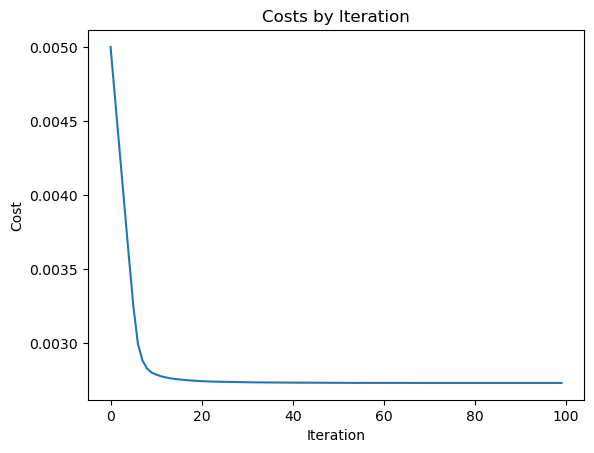

In [133]:
# visualize costs
plt.plot(np.arange(num_iterations), (cost_list))
plt.title("Costs by Iteration")
plt.ylabel('Cost')
plt.xlabel('Iteration')

In [134]:
# check accuracy

def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

predictions = predict_svm(weights, testing)
correct = np.sum(predictions == disease_test)
TP = np.sum((predictions == 1) & (disease_test == 1))
FP = np.sum((predictions == 1) & (disease_test == 0))
TN = np.sum((predictions == 0) & (disease_test == 0))
FN = np.sum((predictions == 0) & (disease_test == 1))

precision = TP/(TP + FP)
recall = TP/(TP + FN)

print("Predictions:", predictions)
print("Accuracy is: ", correct/disease_test.size)
print("Precision is: ", precision)
print("F1 Score: ", 2*(precision*recall)/(precision+recall))

Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy is:  0.45901639344262296
Precision is:  0.45901639344262296
F1 Score:  0.6292134831460674


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [135]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression( fit_intercept=True)
LR.fit(training, disease_train)

LR_predictions = LR.predict(testing)
print('Accuracy score: ' + str(accuracy_score(disease_test, LR_predictions)))
print("LOGISTIC REGRESSION")
print(classification_report(disease_test, LR_predictions))
print("SUPPORT VECTOR MACHINE")
print(classification_report(disease_test, y_pred))

Accuracy score: 0.6885245901639344
LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        33
           1       0.65      0.71      0.68        28

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

SUPPORT VECTOR MACHINE
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        33
           1       0.42      0.29      0.34        28

    accuracy                           0.49        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.48      0.49      0.47        61



Logistic regression seems to perform better than SVM as it boasts higher accuracy, precision, recall, and f-1 scores.

# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [136]:
kernelModel = svm.LinearSVC(C=.01, max_iter=400, fit_intercept=False)
kernelModel.fit(training, disease_train)
print(dir(kernelModel))

print(kernelModel.coef_)
print(kernelModel.fit_intercept)

Kernel_pred = kernelModel.predict(testing)


['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'penalty', 'predict', 'random_state', 'score', 'set_params', 'sparsify', 'tol', 'verbose']
[[ 0.00365419  0.1049

/Users/kevinhan/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [137]:
print("Kernel SVM Performance")
print("Accuracy Score:", accuracy_score(disease_test, Kernel_pred))
print(classification_report(disease_test, Kernel_pred))
print("No Kernel SVM Performance")
print(classification_report(disease_test, y_pred))

Kernel SVM Performance
Accuracy Score: 0.5409836065573771
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        33
           1       0.00      0.00      0.00        28

    accuracy                           0.54        61
   macro avg       0.27      0.50      0.35        61
weighted avg       0.29      0.54      0.38        61

No Kernel SVM Performance
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        33
           1       0.42      0.29      0.34        28

    accuracy                           0.49        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.48      0.49      0.47        61



/Users/kevinhan/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinhan/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kevinhan/opt/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [3]:
for i in range(9, 0, -1):
    print(i)

9
8
7
6
5
4
3
2
1


Performance improved slightly! Accuracy is 5% higher but precision seems to be lower, although recall is higher.